In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

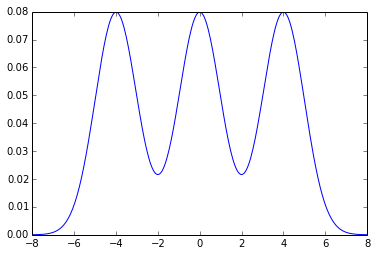

In [32]:
#### generate samples

def mypdf(x):
    y=[]
    for i in range(3):
        y.append(1.0/5*st.norm.pdf(x,loc=-4+4*i,scale=1.0))
    return np.sum(np.array(y))

def notnormalize(x):
    y=[]
    for i in range(3):
        y.append(1.0/5*st.norm.pdf(x,loc=-4+4*i,scale=1.0))
    return -np.log(np.sum(np.array(y)))

x = np.linspace(-8,8,300)
y = np.array([mypdf(x[i]) for i in range(300)])
plt.plot(x,y)
plt.show()

In [28]:
beta_list = np.array([1.0/np.power(2,i*0.5) for i in range(51)])

def sample(x):
    new =[]
    for i in range(100):
        new.append(x)
        x = x+np.random.normal(0,0.1)
    return new

def energy(xlist,betaliest):
    positive =[]
    for i in range(50):
        positive.append((betaliest[i]-betaliest[i+1])*notnormalize(xlist[99-i]))
    negative =[]
    for i in range(50):
        negative.append((betaliest[i]-betaliest[i+1])*notnormalize(xlist[i]))
    return np.sum(np.array(positive)-np.array(negative))

In [ ]:
x=0.0
sample_list =[]
for i in range(3000):
    x_list = sample(x)
    candidate = x_list[-1]
    u = np.random.uniform(0,1)
    alpha = np.exp(-energy(x_list,beta_list))
    ###print alpha
    judge = np.min([1,alpha])
    if judge>u:
        x = candidate
        sample_list.append(candidate)
        

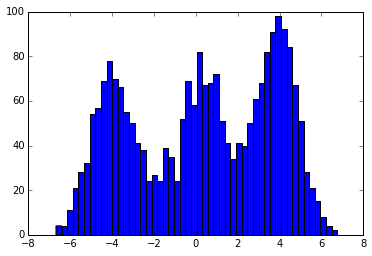

In [36]:
plt.hist(sample_list,bins=50)
plt.show()